### Credit  risk

##  data ingetion/file  reading

In [1]:
path  =  r"C:\Users\admin\Downloads\CreditRisk.xlsx"

In [2]:
import pandas as  pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df  =  pd.read_excel(path )

In [7]:
%pip  install  openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


###  basic  checks  and  quality  checks

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [20]:
#  check  missing  observations
df.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#  check duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# drop  loan id
df.drop('Loan_ID' , axis =  1 , inplace =  True)

In [11]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

####  seperation  of x and  y 

In [12]:
x  = df.drop('Loan_Status' , axis  =  1)
y  =  df['Loan_Status']

In [13]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [14]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [15]:
a  =  y.value_counts()
a

Loan_Status
Y    712
N    269
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

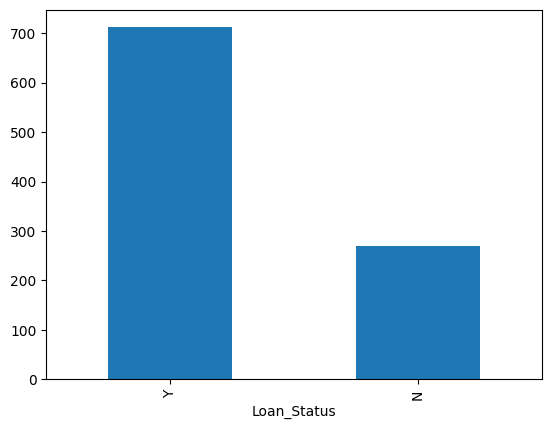

In [16]:
a.plot(   kind  =  'bar')

### seperation  of  cat  and numerical  data

In [17]:
cat  =  x.columns[x.dtypes  == 'object']
num =  x.columns[x.dtypes  != 'object']


In [18]:
print(cat)
print()
print(num)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [19]:
from  sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler  , OneHotEncoder
from sklearn.compose import ColumnTransformer
from  sklearn.impute  import SimpleImputer

### create  pipeline

In [22]:
cat_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy='most_frequent' )) ,  
                                ('enocoder' , OneHotEncoder(handle_unknown  =  'ignore' ))])

num_pipeline  = Pipeline(steps =  [('imputer' , SimpleImputer(strategy= 'mean' )) , 
                                   ('scaler' , StandardScaler())])

In [23]:
pre =  ColumnTransformer([('cat' ,  cat_pipeline,  cat),  
                        ('num' ,  num_pipeline ,  num)])

In [24]:
pre

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


###  apply pipeline  on data

In [25]:
x_scaled =  pre.fit_transform(x)

In [26]:
x_scaled

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.27636827,  0.46203664],
       [ 0.        ,  1.        ,  0.        , ..., -0.19016839,
         0.27636827,  0.46203664],
       [ 0.        ,  1.        ,  0.        , ..., -1.00265609,
         0.27636827,  0.46203664],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.21637767,
         0.27636827,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.20297082,
         0.27636827,  0.46203664],
       [ 0.        ,  1.        ,  1.        , ..., -0.5833076 ,
        -2.51866118,  0.46203664]], shape=(981, 17))

###  convert in dataframe

In [27]:
pre.get_feature_names_out()

array(['cat__Gender_Female', 'cat__Gender_Male', 'cat__Married_No',
       'cat__Married_Yes', 'cat__Education_Graduate',
       'cat__Education_Not Graduate', 'cat__Self_Employed_No',
       'cat__Self_Employed_Yes', 'cat__Property_Area_Rural',
       'cat__Property_Area_Semiurban', 'cat__Property_Area_Urban',
       'num__Dependents', 'num__ApplicantIncome',
       'num__CoapplicantIncome', 'num__LoanAmount',
       'num__Loan_Amount_Term', 'num__Credit_History'], dtype=object)

In [28]:
x_scaled =  pd.DataFrame(x_scaled ,  
                         columns =  pre.get_feature_names_out())

In [29]:
x_scaled

,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,num__Dependents,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.711776,0.117565,-0.589506,0.000000,0.276368,0.462037
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.095410,-0.104844,-0.034561,-0.190168,0.276368,0.462037
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.711776,-0.382944,-0.589506,-1.002656,0.276368,0.462037
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.711776,-0.456202,0.278239,-0.295006,0.276368,0.462037
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.711776,0.144093,-0.589506,-0.019808,0.276368,0.462037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.516967,-0.205684,0.064431,-0.386738,0.276368,0.462037
977,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.711776,-0.179508,-0.328594,-0.360529,0.276368,0.462037
978,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.711776,-0.339024,0.143919,-0.216378,0.276368,0.000000
979,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.711776,-0.031586,0.291119,0.202971,0.276368,0.462037


###  train test  split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train  ,  x_test  ,  y_train  , y_test  =  train_test_split(x_scaled , y , test_size =  0.2  , random_state= 34)

In [33]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape , y_test.shape)

(784, 17) (784,)
(197, 17) (197,)


In [34]:
x_train.head()

,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,num__Dependents,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
776,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.711776,0.070835,-0.589506,-0.347424,0.276368,0.462037
677,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.711776,-0.540880,-0.037505,-0.452261,0.276368,-2.353889
285,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.711776,-0.355187,0.534000,-0.701249,0.276368,0.462037
877,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.095410,2.399811,-0.589506,1.198923,0.276368,0.462037
265,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.711776,-0.190576,0.678992,0.111238,0.276368,0.462037


In [35]:
x_test.head()

,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,num__Dependents,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
778,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.095410,-0.351322,0.282655,-0.819191,-1.586985,0.000000
851,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.902596,0.173255,4.556246,-0.530889,0.276368,0.462037
379,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.902596,0.037104,-0.589506,-0.163959,0.276368,0.462037
396,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.711776,-0.351322,-0.589506,-0.937133,0.276368,-2.353889
694,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.516967,-0.237306,-0.183602,0.268494,0.276368,-2.353889


In [36]:
y_train.head()

776    Y
677    N
285    Y
877    Y
265    Y
Name: Loan_Status, dtype: object

In [37]:
y_test.head()

778    Y
851    Y
379    Y
396    N
694    N
Name: Loan_Status, dtype: object

#### model fitting

In [ ]:
from  sklearn.linear_model import LogisticRegression
model  =  LogisticRegression(n_jobs= -1  )

In [41]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
model.fit(x_train  ,  y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
model.score(x_train  ,  y_train)

0.8533163265306123

In [44]:
model.score(x_test  ,  y_test)

0.8883248730964467

#### model  evaluation 

In [45]:
from sklearn.metrics  import confusion_matrix ,  classification_report


####  training evaluation

In [47]:
train_pred  =  model.predict(x_train)

In [48]:
train_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

In [49]:
train_pred_prob  =  model.predict_proba(x_train)

In [50]:
train_pred_prob

array([[0.20041959, 0.79958041],
       [0.97326587, 0.02673413],
       [0.30678527, 0.69321473],
       ...,
       [0.29922061, 0.70077939],
       [0.94902672, 0.05097328],
       [0.21009449, 0.78990551]], shape=(784, 2))

In [59]:
cf =  confusion_matrix(y_train , train_pred )
cf

array([[103, 107],
       [  8, 566]])

In [60]:
type(cf)

numpy.ndarray

<Axes: >

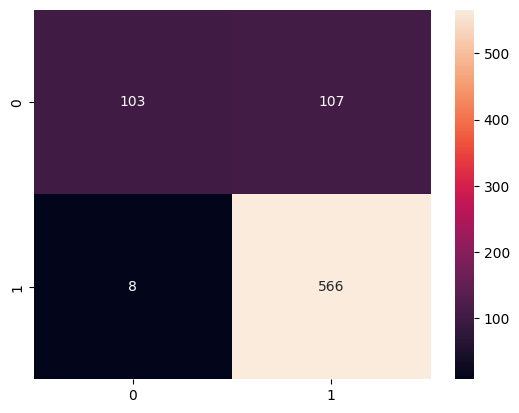

In [61]:
sns.heatmap(cf  ,  xticklabels=True  , yticklabels=True , annot= True  ,  fmt =  'd')

In [64]:
print(classification_report(y_train  ,  train_pred))

              precision    recall  f1-score   support

           N       0.93      0.49      0.64       210
           Y       0.84      0.99      0.91       574

    accuracy                           0.85       784
   macro avg       0.88      0.74      0.77       784
weighted avg       0.86      0.85      0.84       784



### tesing  evaluation

In [65]:
test_pred  =  model.predict(x_test     )
test_pred

array(['Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N

In [66]:
testcf  =  confusion_matrix(y_test  ,  test_pred)

<Axes: >

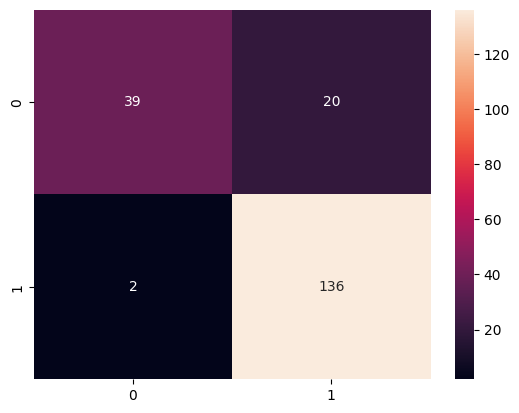

In [67]:
sns.heatmap(testcf  ,  annot  =  True  ,  xticklabels=True  , yticklabels=True ,
            fmt  =  'd')

In [68]:
print(classification_report(y_test ,  test_pred))

              precision    recall  f1-score   support

           N       0.95      0.66      0.78        59
           Y       0.87      0.99      0.93       138

    accuracy                           0.89       197
   macro avg       0.91      0.82      0.85       197
weighted avg       0.90      0.89      0.88       197



### cross  validation score 

In [69]:
from sklearn.model_selection import cross_val_score


In [70]:
logreg  =  LogisticRegression()
cvs  =  cross_val_score(logreg  ,  x_train  ,  y_train  ,  cv   =  5 ,  n_jobs  =  -1 , scoring  =  'f1_macro')

In [71]:
cvs

array([0.74567485, 0.81974742, 0.75883257, 0.784125  , 0.74340542])

In [72]:
cvs.mean()

np.float64(0.770357051301074)

In [73]:
cvs.std()

np.float64(0.02862649001182682)